In [9]:
#pymc tutorial from https://pymc-devs.github.io/pymc3/getting_started/
#slightly played with
#import stuff
import numpy as np
import matplotlib.pyplot as plt
import pymc

In [2]:
#make sample data

# seed random number generator
np.random.seed(1337)

# set parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# number of samples
size = 100

# randomly generated sample inputs
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# linear response + error
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

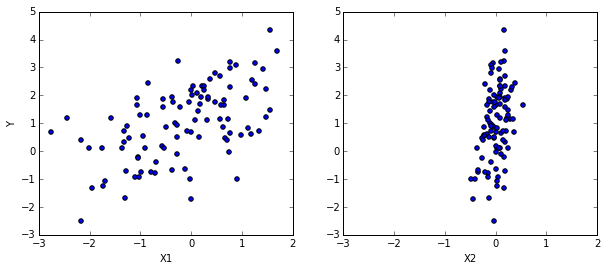

In [4]:
%matplotlib inline 

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [11]:
#this is where we define the model

with pymc.Model() as linear_model:

    # Priors for unknown model parameters
    alpha = pymc.Normal('alpha', mu=0, sd=10)
    beta = pymc.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pymc.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pymc.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    
# Some data
n = 5 * np.ones(4, dtype=int)
x = np.array([-.86, -.3, -.05, .73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha', mu=0, tau=.01)
beta = pymc.Normal('beta', mu=0, tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a + b * x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0., 1., 3., 5.]),
                  observed=True)

AttributeError: __exit__

In [ ]:
# Some data
n = 5 * np.ones(4, dtype=int)
x = np.array([-.86, -.3, -.05, .73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha', mu=0, tau=.01)
beta = pymc.Normal('beta', mu=0, tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a + b * x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0., 1., 3., 5.]),
                  observed=True)